In [2]:
# import libraries
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from mpl_toolkits.mplot3d import Axes3D
from adspy_shared_utilities import plot_fruit_knn

In [3]:
# Week 1: Fundamentos de ML 
# Intro a SciKit - Learn

# metodos:
#pd.read_table(key='file') read .txt files ...   leer tablas:  
# X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0):  dividir train-set y test-set 
# train_test_split(cols,label(index),random_state)


# KNN: K-Nearest Neighbord 
# knn = KNeighborsClassifier(n_neighbors = k):  crear knn clasificador con k neighbors
# knn.fit(X_train,y_train) train-set:   ajustar/entrenar el knn class
# knn.score(X_test,y_test):  medir el accuracy del modelo 
# knn.predict(x:   y_hat predecir a partir de base x


# plot_fruit_knn(X_train, y_train, k, 'uniform'):  graficar las regiones de decision  con base en el train-set

In [4]:
# cargar base 
df_fruits = pd.read_table('fruit_data_with_colors.txt')
df_fruits.head(10)


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [5]:
# genera diccionario con key= fuit_label y key=fruit_name,  
look_fruit_name = dict(zip(df_fruits.fruit_label.unique(), df_fruits.fruit_name.unique()) )
look_fruit_name


{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [6]:
# crear un Clasificador Lineal simple

# crear train-set y test-set del DataFrame(Database)
# over-load las columnas de values

# labels(index) es con lower, vals es con UPPER
X = df_fruits[['mass','width','height','color_score']]
y = df_fruits['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)
print("Vals of train set")
print(X_train.head(5))
print('\b')
print("Label(index) of train set")
print(y_train.head(5))
print('\b')

Vals of train set
    mass  width  height  color_score
42   154    7.2     7.2         0.82
48   174    7.3    10.1         0.72
7     76    5.8     4.0         0.81
14   152    7.6     7.3         0.69
32   164    7.2     7.0         0.80

Label(index) of train set
42    3
48    4
7     2
14    1
32    3
Name: fruit_label, dtype: int64



In [7]:
#cmap = cm.get_cmap('gnuplot')


# create scatter plot
#scatter = pd.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9) )

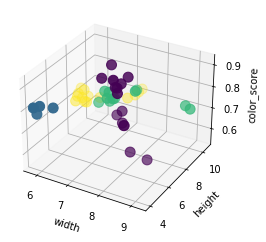

In [8]:

# graficar scatter-plot  3D de los valores 
from mpl_toolkits.mplot3d import Axes3D

# crea una figura usando matplotlib.pyplot as plt
fig = plt.figure()
# crea subplot,  parametro projection = '3d'  para 3D
ax = fig.add_subplot(111, projection = '3d')
# importa los valores de train-set de los datos X_train del dataset
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [9]:
# KNN:  Nearest Neighbor
# 1. distancia euclideana  (Minkowski con p=2)
# 2. parametros k: cuantos NN near neighbors calcular la distancia Euclideana
# 3. OPTIONAL: funcion de peso en los puntos   0 (uniform)
# 4. Agregar clases:  Simple majority vote - la moda 

In [10]:
# crear knn clasificador con k=5 neighbors
knn = KNeighborsClassifier(n_neighbors = 5)

# knn.fit(X_train,y_train) train-set:  entrenar el clasificador knn con el 
knn.fit(X_train,y_train)

# knn.score(X_test,y_test):  accuracy de clasificación correcta 
# medir el performance del modelo knn 
knn.score(X_test,y_test)

# knn.predict([[vals]] ) y_hat vector  predecir objeto a partir de nueva base
fruit_prediction = knn.predict([[20,4.3,5.5,0.5]])
# buscar fruit en el diccionario
look_fruit_name[fruit_prediction[0]]

C:\Users\Diego\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


'mandarin'

In [11]:
from adspy_shared_utilities import plot_fruit_knn
# plot_fruit_knn(X_train,y_train,k_neigh,'uniform')
# plot las desicion boundaries  con base en el train-set, y el knn de neighbours
#plot_fruit_knn(X_train, y_train, 5, 'uniform')
